Problem:
- Can we create a good model for determining whether content is more applicable to r/frugal or r/investing?
- Can we establish the most common differences in language between people investing and frugality?

In [1]:
import time
import praw
import pandas as pd
import numpy as np
from praw.models import MoreComments

In [2]:
reddit = praw.Reddit(client_id='SYobNiDMynOZmQ',
                     client_secret='JvR67hbTaN7K00Sw0VqCs9bu9CI',
                     user_agent='cosimon88')

In [17]:
subreddit_frugal = reddit.subreddit('frugal')
subreddit_investing = reddit.subreddit('investing')

In [12]:
hot_frugal = subreddit_frugal.hot(limit=3)

In [116]:
# look at directory attributes
for submission in hot_frugal:
    print('-'*10) # viewing separator
    print(sorted(dir(submission)))

----------
['STR_FIELD', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chunk', '_comments_by_id', '_fetch', '_fetch_data', '_fetch_info', '_fetched', '_kind', '_reddit', '_reset_attributes', '_safely_add_arguments', '_url_parts', '_vote', 'all_awardings', 'allow_live_comments', 'approved_at_utc', 'approved_by', 'archived', 'author', 'author_flair_background_color', 'author_flair_css_class', 'author_flair_richtext', 'author_flair_template_id', 'author_flair_text', 'author_flair_text_color', 'author_flair_type', 'author_fullname', 'author_patreon_flair', 'author_premium', 'awarders', 'banned_at_utc', 'banned_by', 'can_gild', 'can_mod_post', 'category', 'clear_vote', 'clicked', '

In [13]:
for submission in hot_frugal:
    print('Title: {}, ups: {}, downs:{}, Have we visited: {}'.format(submission.title,
                                                                    submission.ups,
                                                                    submission.downs,
                                                                    submission.visited))
    comments = submission.comments.list()
    for comment in comments:
        print(20*'-')
        print('Parent ID:', comment.parent())
        print('Comment ID:', comment.id)
        print(comment.body)
        print(sorted(dir(comment)))
                

Title: Thrifty Thursday - share your hauls, finds, tips and tricks. - April 16, ups: 15, downs:0, Have we visited: False
--------------------
Parent ID: g2e1io
Comment ID: fnkw6u7
I bought my refill liquid soap today. Got a 3x 1L bottle pack on special. Can I say I was absolutely baffled that the stock was full when all the small 250ml + bottles had been cleared from the shelves.
['MISSING_COMMENT_MESSAGE', 'STR_FIELD', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_extract_submission_id', '_fetch', '_fetch_data', '_fetch_info', '_fetched', '_kind', '_reddit', '_replies', '_reset_attributes', '_safely_add_arguments', '_submission', '_url_parts', '_vote', 'all_awardings', 'appro

--------------------
Parent ID: g4spqi
Comment ID: fnzcgdp
It sometimes is too good; when I have to wipe at work or some other place, I feel disgusting and dirty the whole day until I get home an clean off using the bidet.
['MISSING_COMMENT_MESSAGE', 'STR_FIELD', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_extract_submission_id', '_fetch', '_fetch_data', '_fetch_info', '_fetched', '_kind', '_reddit', '_replies', '_reset_attributes', '_safely_add_arguments', '_submission', '_url_parts', '_vote', 'all_awardings', 'approved_at_utc', 'approved_by', 'archived', 'associated_award', 'author', 'author_flair_background_color', 'author_flair_css_class', 'author_flair_richtext', 'autho

AttributeError: 'MoreComments' object has no attribute 'parent'

In [114]:
for submission in hot_frugal:
    print('Title: {}, ups: {}'.format(submission.title,
                                    submission.ups))
    submission.comments.replace_more(limit=0)
    
    for comment in submission.comments.list():
        print(20*'-')
        print('Parent ID:', comment.parent())
        print('Comment ID:', comment.id)
        print(comment.body.encode("utf-8", errors='ignore')) # from YouTuber Fright Street
                

Title: Thrifty Thursday - share your hauls, finds, tips and tricks. - April 16, ups: 13
--------------------
Parent ID: g2e1io
Comment ID: fnkw6u7
b'I bought my refill liquid soap today. Got a 3x 1L bottle pack on special. Can I say I was absolutely baffled that the stock was full when all the small 250ml + bottles had been cleared from the shelves.'
--------------------
Parent ID: g2e1io
Comment ID: fnn08e2
b"I love colorful hair and once got the tips of my hair dyed bright blue, but because it's double process and they bleach it first it was like $200. This week I found out that even if you don't bleach it first, you can still have fun with colorful hair dye at home! I've been cutting my own hair for years (28F) but I never thought I'd be brave enough to do anything but shades of brown at home.\n\nBox dye = $8\n\nSalon dye job = $200+"
--------------------
Parent ID: g2e1io
Comment ID: fnlhbqr
b"If you don't have the Freeosk app yet, you should check it out. I got my free sample of P

--------------------
Parent ID: g3ah5o
Comment ID: fnqlje8
b'If anyone is in Chicago and in need of a meal, please let me know. I am trying to do this every Friday and I usually end up having a few extra.\n\nEdit: more words.'
--------------------
Parent ID: g3ah5o
Comment ID: fnqhw03
b'[removed]'
--------------------
Parent ID: g3ah5o
Comment ID: fnqpr7s
b'That is a wonderful thing you are doing.   One of my favorite, and tasty, crowd meals is pulled pork (or chicken) sandwiches.  Pork shoulder is pretty cheap, it can be roasted, or smoked, then cut up, then placed in a crockpot (or Nesco) with bbq sauce.    Serve with buns, and cole slaw (a cheap, and appropriate, side) and, maybe some macaroni salad.   My DH and I just made this for the nurses in the ICU unit at his hospital.  We managed to serve about 40 nurses for $85.'
--------------------
Parent ID: g3ah5o
Comment ID: fnqpcj9
b'You are a hero. Mr. Rogers would be damn proud to call you his neighbor.'
--------------------
Parent 

In [14]:
%%time

# create subreddit object
top_frugal = subreddit_frugal.top(limit=3)

# initialize empty list
frugal_series = []

# make dictionaries to append to empty list
for submission in top_frugal:
    post = {}
    post['subreddit'] = 1
    post['submission'] = 1
    post['comment'] = 0
    post['title'] = submission.title
    post['body'] = submission.selftext
    post['ups'] = submission.ups
    post['id'] = submission.id
    frugal_series.append(post)
    time.sleep(2)
    
    # second for loop concept from YouTuber "sentdex"
    # https://www.youtube.com/watch?v=KX2jvnQ3u60
    # third for loop and try/except features are my own.
    
#     submission.comments.replace_more(limit=0)
    comments = submission.comments
    for comment in comments:
#         if isinstance(comment, MoreComments):
#             continue
        post_comments = {}
        post_comments['subreddit'] = 1
        post_comments['submission'] = 0
        post_comments['comment'] = 1
        post_comments['title'] = 0
        post_comments['id'] = comment.id
        try:
            post_comments['body'] = comment.body
        except:
            continue
        post_comments['ups'] = comment.score
        if post_comments['ups'] >= 3:
            frugal_series.append(post_comments)
#         if len(comment.replies) > 0:    
#             for reply in comment.replies:
#                 post_replies = {}
#                 post_replies['Submission'] = 0
#                 post_replies['Comment'] = 1
#                 post_replies['Title'] = 0
#                 post_replies['Body'] = comment.body
#                 post_replies['Ups'] = submission.ups
#                 frugal_series.append(post_replies)
        

CPU times: user 255 ms, sys: 56.4 ms, total: 311 ms
Wall time: 14.2 s


In [6]:
type(comments)

praw.models.comment_forest.CommentForest

In [15]:
frugal = pd.DataFrame(frugal_series)
frugal

,subreddit,submission,comment,title,body,ups,id
0,1,1,0,"I work at a travel agency, and when we have to...",,46545,a862nq
1,1,0,1,0,I love this idea. They work great for other cr...,2341,ec88u8t
2,1,0,1,0,"Love this. As a map nerd, I’d consider the wr...",289,ec8a9cc
3,1,0,1,0,Mapping paper!,348,ec8b8xy
4,1,0,1,0,"In aviation we have ""sectionals"". They're out ...",154,ec8b2fs
...,...,...,...,...,...,...,...
127,1,0,1,0,My friend is in to these things. I just don't ...,4,ds2kan7
128,1,0,1,0,"As **fun** as this looks, I have trouble justi...",4,ds2n0em
129,1,0,1,0,Not super frugal when the edge of my counter t...,3,ds2t91v
130,1,0,1,0,Just roll a shaving cream bottle over it that'...,4,ds2ixtt


In [16]:
frugal.nunique()

subreddit       1
submission      2
comment         2
title           4
body          128
ups            50
id            132
dtype: int64

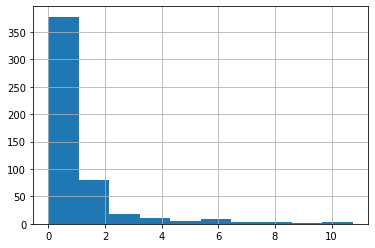

In [169]:
np.log(frugal['Ups']).hist();

This is the distribution of "ups" on the log scale. We should clear comments with score <= 2.

In [ ]:
for i in range(3000):
   # print(i)
    if after ==None:
        params ={}
    else:
        params = {'after': after}
    res =requests.get(url, params =params, headers ={"User-agent": "your agent name"})

In [137]:
x = 'hello'
y = []
if x:
    print(1)
else:
    print(0)

1


In [46]:
frugal = []

for submission in reddit.subreddit('frugal').hot(limit=5):
    frugal.append(submission)

In [47]:
frugal

[Submission(id='g2e1io'),
 Submission(id='g3ojh2'),
 Submission(id='g3ah5o'),
 Submission(id='g3pak7'),
 Submission(id='g3m2o6')]

In [31]:
for submission in reddit.subreddit('frugal').hot(limit=10):
    print(submission.title)

Thrifty Thursday - share your hauls, finds, tips and tricks. - April 16
Tip: Lower your monthly cell data plan if you are home all day
UPDATE: Feeding who I can
Bed sheet color fading, can I dye them?
Ideas for care packages
What frugal skills did you learn from older generations that you’re glad to have now?
Need a new windshield, insurance isn't covering it
What are your new frugal habits during the pandemic?
Make your own turmeric capsules with a capsule maker
Moving once this shelter in place situation is over. Looking for second hand furniture shops.


In [7]:
url = 'https://api.pushshift.io/reddit/search/submission'

In [10]:
params = {
    'subreddit': 'boardgames'
}

In [11]:
res = requests.get(url, params)

ConnectionError: HTTPSConnectionPool(host='api.pushshift.io', port=443): Max retries exceeded with url: /reddit/search/submission?subreddit=boardgames (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x112ac3750>: Failed to establish a new connection: [Errno 61] Connection refused'))